In [1]:
# import things
import torch
from torchvision import datasets, transforms
import helper

In [2]:
# transform definition for normalizing data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5, 0.5), (0.5, 0.5, 0.5, 0.5))
])

# Download and load training data
trainset = datasets.FashionMNIST('F_MNIST_data', download=True, transform=transform, train=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load test data
testset = datasets.FashionMNIST('F_MNIST_data', download=True, transform=transform, train=False)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

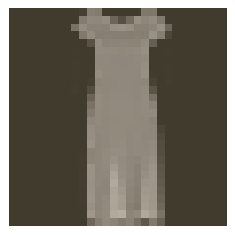

In [3]:
images, labels = next(iter(trainloader))
helper.imshow(images[0, :])

In [4]:
print('size of images: {}'.format(images.size()))
print('size of labels: {}'.format(labels.size()))

size of images: torch.Size([64, 1, 28, 28])
size of labels: torch.Size([64])


In [5]:
# import necessary packages
%matplotlib inline

import time
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from collections import OrderedDict

import helper

## Building The Networks

In [6]:
# hyperparameters
input_size = 784
hidden_size = [300, 200]
output_size = 10

model = nn.Sequential(OrderedDict([
    ('fc1', nn.Linear(in_features=input_size, out_features=hidden_size[0])),
    ('relu1', nn.ReLU()),
    ('fc2', nn.Linear(in_features=hidden_size[0], out_features=hidden_size[1])),
    ('relu2', nn.ReLU()),
    ('logits', nn.Linear(in_features=hidden_size[1], out_features=output_size))
]))

print(model)

Sequential(
  (fc1): Linear(in_features=784, out_features=300, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=300, out_features=200, bias=True)
  (relu2): ReLU()
  (logits): Linear(in_features=200, out_features=10, bias=True)
)


In [7]:
# Define the loss criterion and optimizer
# criterion is used for computing the loss
# optimizer is used for updating the model parameters/weights
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.004)

In [8]:
# defining training parameters
epochs = 5
print_every = 50    # the loss and training accuracy will be printed after number of this variable
step = 0    # used for computing the training step process

for e in range(epochs):
    epoch_loss = 0
    for images, labels in trainloader:
        step += 1
        
        # flatten image data to match input_size of the network
        images.resize_(images.size()[0], 784)
        
        # zero the gradient
        optimizer.zero_grad()
        
        # Do forward pass
        output = model.forward(images)
        # calculate loss
        loss = criterion(output, labels)
        # Do backward pass
        loss.backward()
        # Update the weights using defined otimizer
        optimizer.step()
        
        # Sum up the loss for one epoch
        epoch_loss += loss.item()
        
        # Print loss and epoch
        if step % print_every == 0:
            print('Epoch: {}/{}..'.format(e+1, epochs),
                  'Loss: {:.4f}'.format(epoch_loss/print_every))
            
            epoch_loss = 0
        

Epoch: 1/5.. Loss: 0.9333
Epoch: 1/5.. Loss: 0.5944
Epoch: 1/5.. Loss: 0.5713
Epoch: 1/5.. Loss: 0.5627
Epoch: 1/5.. Loss: 0.5393
Epoch: 1/5.. Loss: 0.5093
Epoch: 1/5.. Loss: 0.5481
Epoch: 1/5.. Loss: 0.4590
Epoch: 1/5.. Loss: 0.4903
Epoch: 1/5.. Loss: 0.4416
Epoch: 1/5.. Loss: 0.4953
Epoch: 1/5.. Loss: 0.4720
Epoch: 1/5.. Loss: 0.4757
Epoch: 1/5.. Loss: 0.4560
Epoch: 1/5.. Loss: 0.4401
Epoch: 1/5.. Loss: 0.4210
Epoch: 1/5.. Loss: 0.4217
Epoch: 1/5.. Loss: 0.4323
Epoch: 2/5.. Loss: 0.0920
Epoch: 2/5.. Loss: 0.3950
Epoch: 2/5.. Loss: 0.3983
Epoch: 2/5.. Loss: 0.4164
Epoch: 2/5.. Loss: 0.4024
Epoch: 2/5.. Loss: 0.4044
Epoch: 2/5.. Loss: 0.4021
Epoch: 2/5.. Loss: 0.4478
Epoch: 2/5.. Loss: 0.3990
Epoch: 2/5.. Loss: 0.3937
Epoch: 2/5.. Loss: 0.4032
Epoch: 2/5.. Loss: 0.3822
Epoch: 2/5.. Loss: 0.4286
Epoch: 2/5.. Loss: 0.3779
Epoch: 2/5.. Loss: 0.3696
Epoch: 2/5.. Loss: 0.3937
Epoch: 2/5.. Loss: 0.4070
Epoch: 2/5.. Loss: 0.3635
Epoch: 2/5.. Loss: 0.4361
Epoch: 3/5.. Loss: 0.1590
Epoch: 3/5..

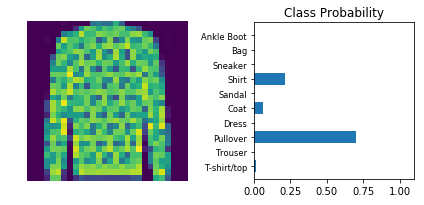

In [9]:
# Test out the network

# Create the iterator
dataiter = iter(testloader)
# Assign the every element in testloader into images and labels
images, label = next(dataiter)
# Resize images shape to match the input size of the network
img = images.resize_(1, 784)

# Calculate class probability
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and the probability
helper.view_classify(img, ps, version='Fashion')

In [10]:
# next(dataiter)
dataiter.next()

[tensor([[[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],
 
 
         [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           ...,
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
           [-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000]]],
 
 
         [[[-1.0000, -1.0000, -1.0000,  ..., -1.0000, -1.0000, -1.0000],
       